In [25]:
from orbit.estimators.pyro_estimator import PyroEstimator, PyroEstimatorVI, PyroEstimatorMAP
from orbit.estimators.stan_estimator import StanEstimator, StanEstimatorMCMC, StanEstimatorVI, StanEstimatorMAP
from orbit.models.lgt import BaseLGT, LGTFull, LGTAggregated, LGTMAP
from orbit.models.dlt import DLTMAP
from orbit.constants.constants import PredictedComponents
from orbit.utils.dataset import load_iclaims



In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from orbit.diagnostics.plot import plot_predicted_data
from orbit.utils.simulation import make_trend, make_seasonality, make_regression

In [27]:
rw = make_trend(200, rw_loc=0.05, rw_scale=0.2, seed=2020)
ds = make_seasonality(200, seasonality=7, duration=12, method='discrete', seed=2020)
coefs = [0.1, -.33, 0.8]
x, reg, coefs = make_regression(200, coefs, scale=2.0, seed=2020)

In [28]:
y = reg + rw + ds + np.random.normal(0, 0.1, 200)  + 10.0

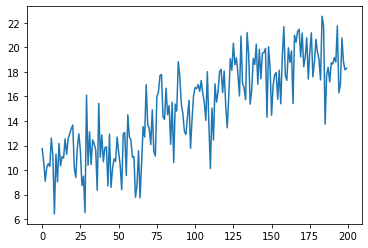

In [29]:
plt.plot(y)

In [30]:
print(y.shape)
print(x.shape)

(200,)
(200, 3)


In [31]:
df = pd.DataFrame(np.concatenate([y.reshape(-1, 1), x], axis=-1),
                 columns=['y','x1','x2','x3'])
df['date'] = pd.date_range(start='2019-01-31', periods=200, freq='M')

In [32]:
regressor_signs = ['+', '-', '=']
regressor_col = ['x1', 'x2', 'x3']
new_regressor_col = [regressor_col[idx] for idx in [1, 2, 0]]
new_regressor_signs = [regressor_signs[idx] for idx in [1, 2, 0]]
new_df = df[['y', 'date'] + new_regressor_col]

In [33]:
lgt = DLTMAP(
    response_col='y',
    date_col='date',
    regressor_col=regressor_col,
    regressor_sign=regressor_signs,
    seasonality=12,
    seed=8888,
)
lgt.fit(df.copy())
predicted_df_v1 = lgt.predict(df)
predicted_df_v2 = lgt.predict(new_df)
# mixing ordering of signs
lgt_new = DLTMAP(
    response_col='y',
    date_col='date',
    regressor_col=new_regressor_col,
    regressor_sign=new_regressor_signs,
    seasonality=12,
    seed=8888,
)
lgt_new.fit(df.copy())
predicted_df_v3 = lgt_new.predict(df.copy())
predicted_df_v4 = lgt_new.predict(new_df.copy())

In [34]:
lgt.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,x1,Positive,0.000011
1,x2,Negative,-0.000012
2,x3,Regular,0.831015


In [35]:
lgt_new.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,x1,Positive,0.000011
1,x2,Negative,-0.000012
2,x3,Regular,0.831015


In [ ]:
plot_posterior_params

In [15]:
regressor_signs = ['=', '=', '-']
regressor_col = ['trend.unemploy', 'trend.filling', 'trend.job']
new_regressor_col = [regressor_col[idx] for idx in [1, 2, 0]]
new_regressor_signs = [regressor_signs[idx] for idx in [1, 2, 0]]
df = load_iclaims()
df['claims'] = np.log(df['claims'])
df['trend.job'] = -1 * df['trend.job']
new_df = df[['claims', 'week'] + new_regressor_col]

In [16]:
lgt = LGTMAP(
    response_col='claims',
    date_col='week',
    regressor_col=regressor_col,
    regressor_sign=regressor_signs,
    seasonality=52,
    seed=8888,
)
lgt.fit(df.copy())
predicted_df_v1 = lgt.predict(df)
predicted_df_v2 = lgt.predict(new_df)
# mixing ordering of signs
lgt_new = LGTMAP(
    response_col='claims',
    date_col='week',
    regressor_col=new_regressor_col,
    regressor_sign=new_regressor_signs,
    seasonality=52,
    seed=8888,
)
lgt_new.fit(df.copy())
predicted_df_v3 = lgt_new.predict(df.copy())
predicted_df_v4 = lgt_new.predict(new_df.copy())

In [17]:
lgt._get_init_values()()['rr_beta']

array([0., 0.])

In [18]:
np.allclose(lgt._get_init_values()()['init_sea'], lgt_new._get_init_values()()['init_sea'])

False

In [19]:
lgt._get_init_values()()

{'init_sea': array([ 0.05732344,  0.01979308, -0.04591276,  0.03176437,  0.00101916,
         0.04803062,  0.0392062 ,  0.00959545,  0.05887294, -0.03433576,
        -0.02797465,  0.02024448,  0.06404265, -0.04002535,  0.02447833,
         0.05926154, -0.01539364, -0.00517055, -0.06583509, -0.12836627,
        -0.0278129 , -0.03732584,  0.01308591,  0.04082038,  0.07483059,
        -0.0223245 ,  0.0075327 , -0.01699646, -0.01354519,  0.08233617,
        -0.07604284, -0.09183811,  0.02022832, -0.01284678, -0.0608792 ,
         0.02513123,  0.01881125, -0.00895952, -0.01140002,  0.02179323,
        -0.01502139, -0.02164889, -0.00410669, -0.00519384,  0.0029224 ,
        -0.00512204,  0.05323111,  0.04521251, -0.06489218, -0.07911337,
         0.06691175]),
 'nr_beta': array([-1.e-05]),
 'rr_beta': array([0., 0.])}

In [20]:
lgt_new._get_init_values()()

{'init_sea': array([ 0.0360694 , -0.15491285,  0.00016118, -0.0826232 , -0.09561052,
         0.06737107, -0.02976663, -0.04978206,  0.01052317,  0.01720302,
        -0.02406879,  0.04045442,  0.00162341,  0.02591522, -0.04546228,
         0.03319021, -0.04071329,  0.06670152, -0.02612956, -0.04751691,
         0.03306383,  0.06014548, -0.013515  ,  0.08357805,  0.04224313,
         0.02300453, -0.05097036,  0.02316567, -0.06073598,  0.03360163,
         0.03465246,  0.01112119,  0.05219152,  0.00259624, -0.0640621 ,
         0.06592499, -0.09063675,  0.0334947 , -0.10493715, -0.02825749,
         0.04641321, -0.01119112,  0.08164468, -0.06746006, -0.01126837,
         0.02386935, -0.00084322, -0.04247008, -0.00621159, -0.04475571,
         0.04641015]),
 'nr_beta': array([-1.e-05]),
 'rr_beta': array([0., 0.])}

In [21]:
print(regressor_signs)
print(regressor_col)
print(new_regressor_signs)
print(new_regressor_col)

['=', '=', '-']
['trend.unemploy', 'trend.filling', 'trend.job']
['=', '-', '=']
['trend.filling', 'trend.job', 'trend.unemploy']


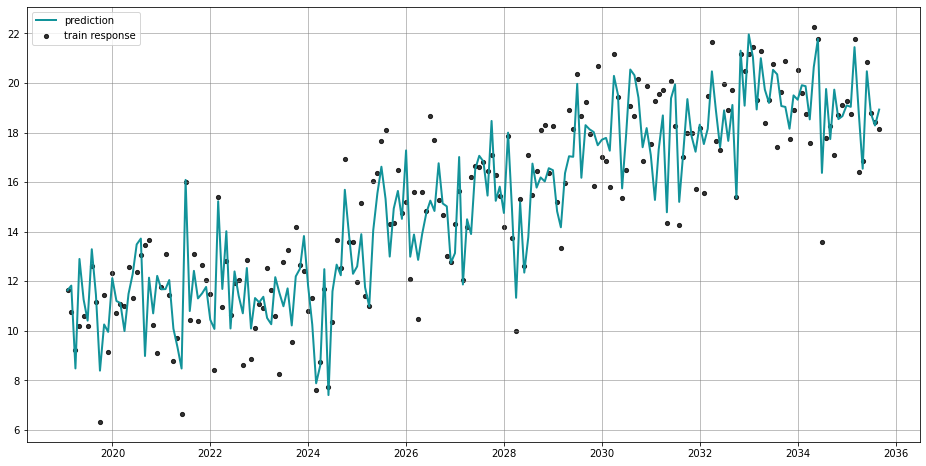

In [48]:
plot_predicted_data(df, predicted_df_v1, 'date', 'y')

In [22]:
pred_v1 = predicted_df_v1['prediction'].values
pred_v2 = predicted_df_v2['prediction'].values
pred_v3 = predicted_df_v3['prediction'].values
pred_v4 = predicted_df_v4['prediction'].values

In [23]:
lgt.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,trend.job,Negative,0.000000
1,trend.unemploy,Regular,0.039016
2,trend.filling,Regular,0.070690


In [24]:
lgt_new.get_regression_coefs()

,regressor,regressor_sign,coefficient
0,trend.job,Negative,0.000000
1,trend.filling,Regular,0.070740
2,trend.unemploy,Regular,0.039018


In [13]:
np.allclose(pred_v1, pred_v4, atol=1e-3)

True

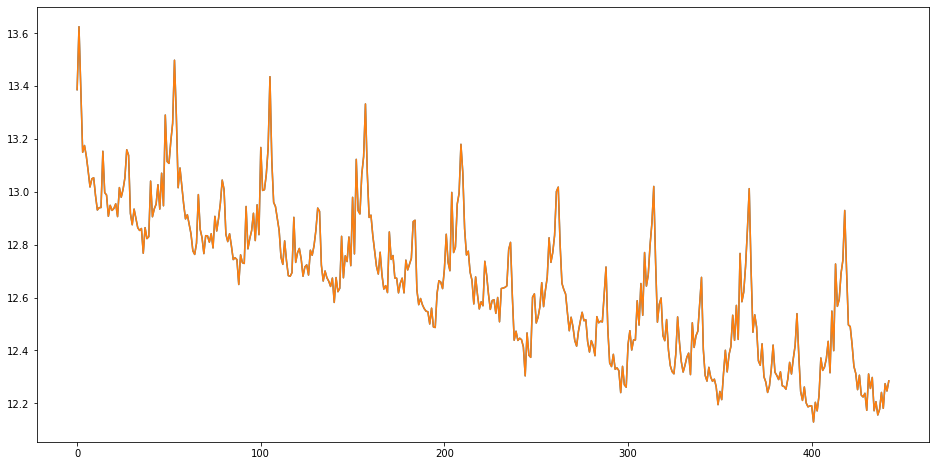

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
ax.plot(pred_v1)
ax.plot(pred_v3)